# Image Augmentation in Deep Learning - Technique demonstration using skimage in Python
* Notebook by Adam Lang
* Date: 3/1/2024
* We will review what image augmentation is and then show a simple implementation using the Python library skimage

# Things we will review
1. Why do we need Image Augmentation?
2. Different Image Augmentation Techniques
    * Image Rotation
    * Image Shifting
    * Image Flipping
    * Image Noising
    * Image Blurring
3. Guidelines for selecting the best augmentation technique

# Why do we need image augmentation?
* More data = better results in deep learning!
* However, it is not always possible to obtain more data, it can be expensive or even time consuming.
* **Instead of having to obtain more data, we can generate new images from the training data to augment or increase the number of training samples in the data.**

# Image Augmentation Techniques
1. Image Rotation - one of most common
    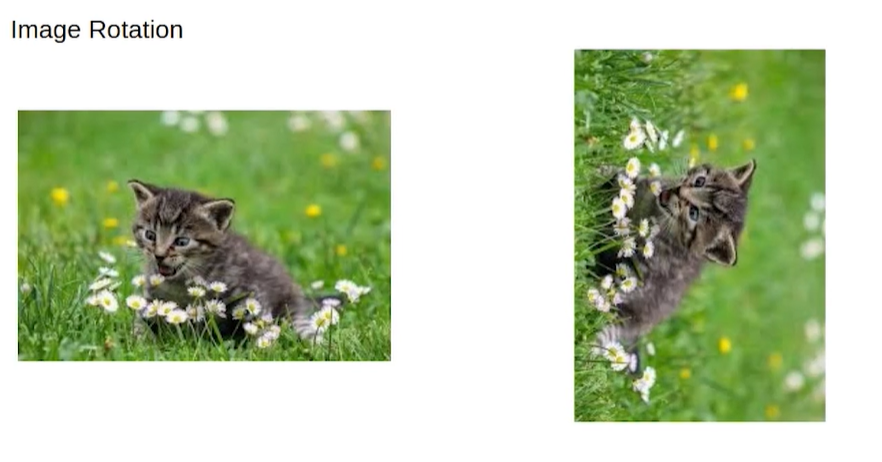

2. Image Shifting
* Change position of objects in image.
* This can give more training knowledge to the model to improve its accuracy.
* This involves geometric shifting which is represented by this equation:
(x,y) ------> (X,Y)

....where X = x + dx (dx is the shift)
....where Y = y + dy (dy is the shift)

An example of image shifting:
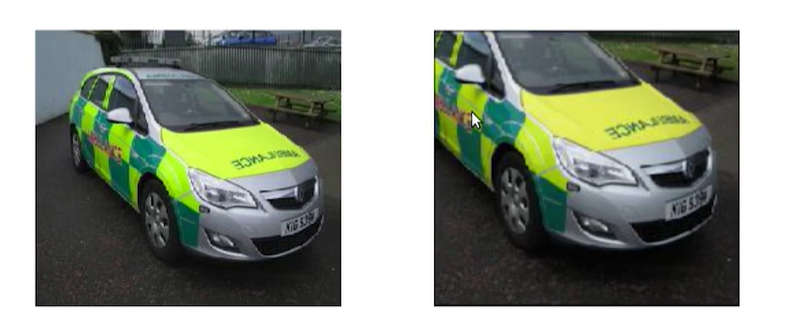



3. Image Flipping
  * Extension of rotation.
  a. Left-Right
  b. Up-Down
  * Below we can see the image on the left is the original training data image.
  * The image in the center is the left-right flip.
  * The image on the right is the up-down shift.

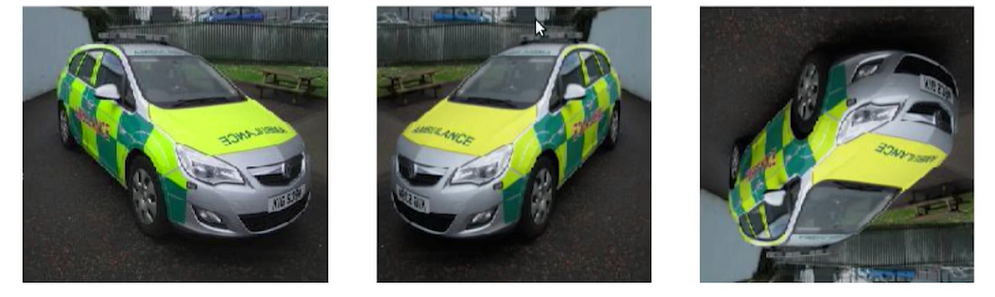

4. Image Noising
  * Trains the model to separate signals from noise.
  * Trains model to become more robust to changes from unseen data.
Example of image noising:

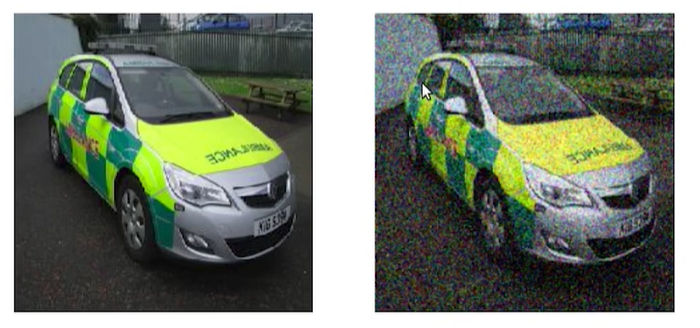

5. Image Blurring
  * Not all images are high quality in the "real world".
  * Thus, training a model to handle poor quality images will improve its ability to perform on unseen data.

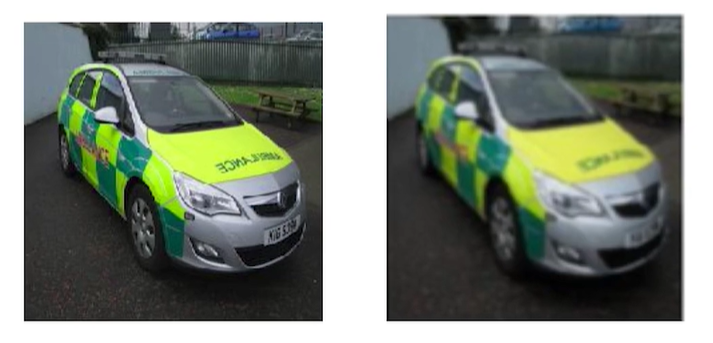

# Implementation of Image Augmentation techniques using skimage in Python

In [1]:
# import libraries
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Image Rotation

Original Image


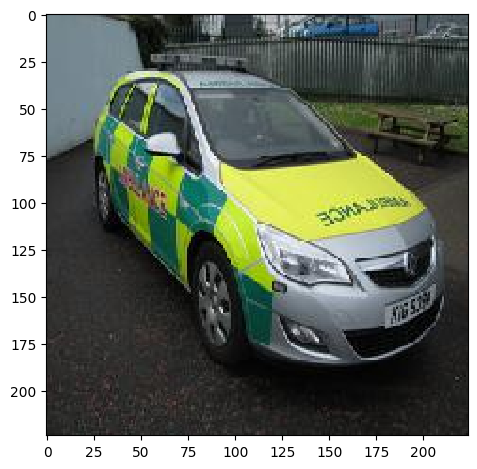

In [2]:
# read in the image
image = imread('/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks/emergency_car.jpg')
print('Original Image')

#show original image
imshow(image)

Rotated_Image


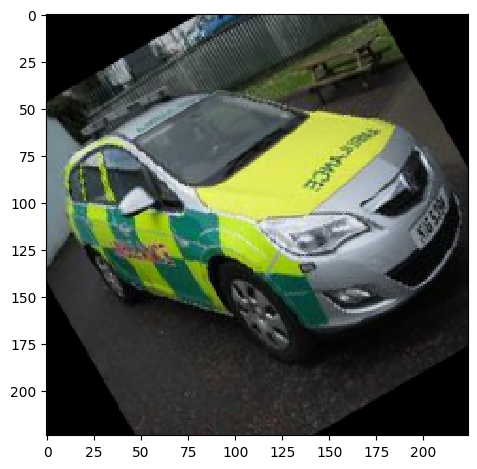

In [3]:
# import required libraries
from skimage.transform import rotate

# rotating image by 30 degrees
rotated = rotate(image, angle=30)
#plot the rotated image
print('Rotated_Image')

#show image with imshow from skimage
imshow(rotated)

# 2. Image Shifting
* After shifting, an object present at location (x,y) in the input image is shifted to a new position (X,Y):
   * `X = x + dx`
   * `Y = y + dy`
   *note: `dx` and `dy` are the pixel values by which the object is shifted.

Text(0.5, 1.0, 'Original Image')

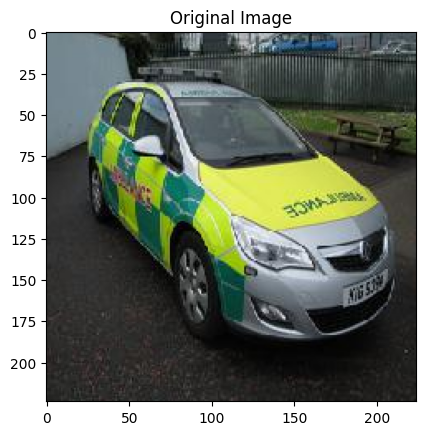

In [5]:
# read the image
image = imread('/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks/emergency_car.jpg')

# show image
plt.imshow(image)
plt.title('Original Image')

We will use the AffineTransform from skimage
* docs: https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.AffineTransform
* An affine transformation will preserve collinearity.

Text(0.5, 1.0, 'Normal Shift')

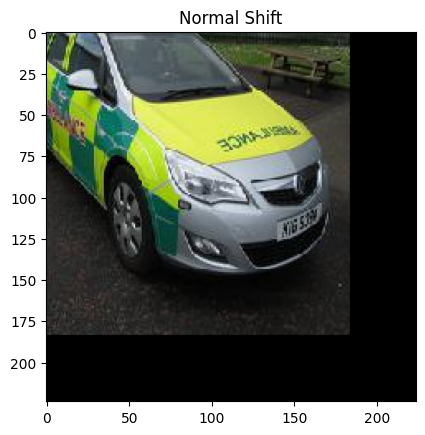

In [6]:
# apply shift operatin using skimage
from skimage.transform import AffineTransform, warp
transform = AffineTransform(translation=(40,40))
Shift = warp(image, transform)

#show result
plt.imshow(Shift)
plt.title('Normal Shift')

summary: note the pixel values on the x and y axis were replaced by the color black. We can transform this below.

Text(0.5, 1.0, 'Wrap Shift')

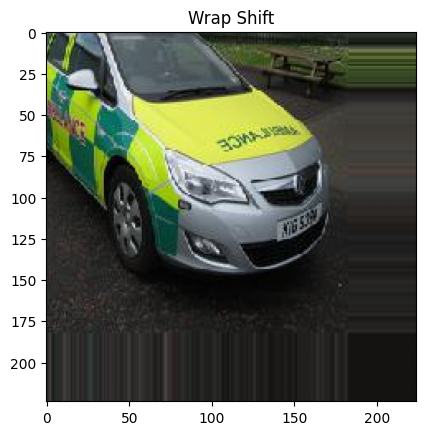

In [7]:
# filling the black portion of image
wrapShift = warp(image, transform, mode='edge') # will replace empty black values with image edge
plt.imshow(wrapShift)
plt.title('Wrap Shift')

summary: we can see that we now removed the black color and replaced it with the image edge.

# 3. Image Flipping

Text(0.5, 1.0, 'Original Image')

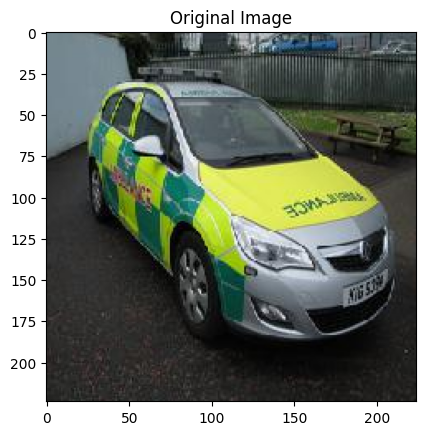

In [10]:
# reading the image
image = imread('/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks/emergency_car.jpg')

# view original image
plt.imshow(image)
plt.title('Original Image')

### There is no direct 'flip' function in skimage
* Therefore we will use numpy to do this.

Text(0.5, 1.0, 'Left to Right Flipped')

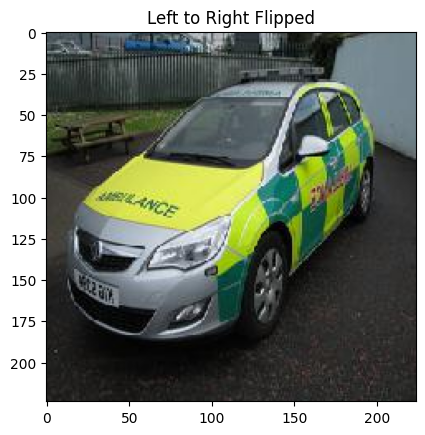

In [11]:
# flip image left-to-right
flipLR = np.fliplr(image)

#show result
plt.imshow(flipLR)
plt.title('Left to Right Flipped')

Text(0.5, 1.0, 'Up Down Flipped')

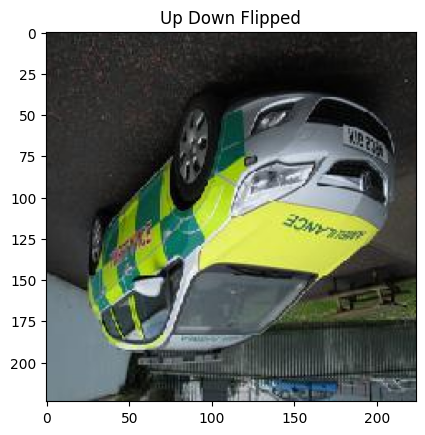

In [12]:
# flip image up-to-down
flipUD = np.flipud(image)

# show result
plt.imshow(flipUD)
plt.title('Up Down Flipped')

# 4. Image Noising

Text(0.5, 1.0, 'Original Image')

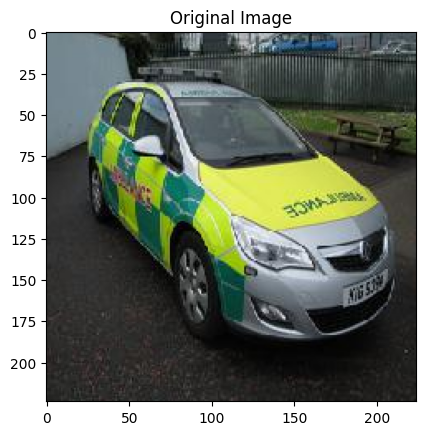

In [13]:
# read image data
image = imread('/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks/emergency_car.jpg')

#show original image
plt.imshow(image)
plt.title('Original Image')

We will use skimage to add noise.
* random_noise is the function to do this.
* var is the variance function to specify the noise amount.
* A higher var = more noise

Text(0.5, 1.0, 'Random Noise')

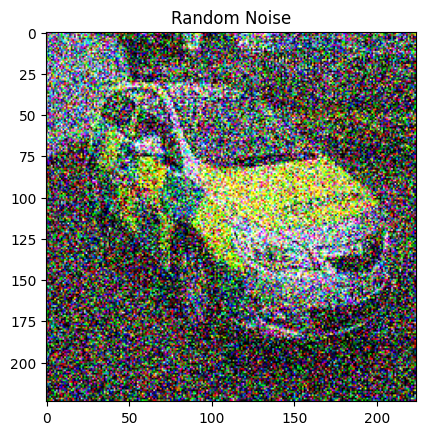

In [14]:
# import skimage library - random_noise will add random noise to image
from skimage.util import random_noise
# add random noise to the image
noisyRandom = random_noise(image, var=0.2) #variance is the amount of noise to add

# show result
plt.imshow(noisyRandom)
plt.title('Random Noise')

Below we will show an alternative way to do this using a `Gaussian Distribution`

Text(0.5, 1.0, 'Gaussian Noise')

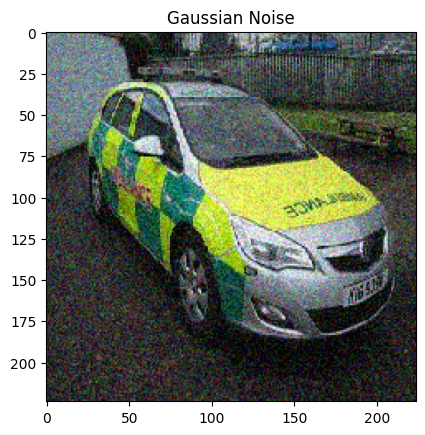

In [15]:
# add gaussian noise to image
noisyGaussian = random_noise(image, mode='gaussian')

# show result of gaussian noise
plt.imshow(noisyGaussian)
plt.title('Gaussian Noise')

# 5. Image Blurring

Text(0.5, 1.0, 'Original Image')

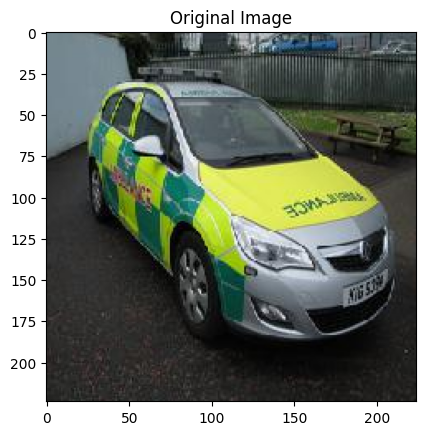

In [16]:
# read the image
image = imread('/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks/emergency_car.jpg')

# show image
plt.imshow(image)
plt.title('Original Image')

We will use the gaussian blur technique
* Also known as "gaussian smoothing"
* Thus we are applying a gaussian or normal distribution to the image pixels.
* Sigma increase => more blur
* Multichannel is for RGB and above

<ipython-input-18-fa088b00d062>:5: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurred = gaussian(image, sigma=2.5, multichannel=True) #multichannel for RGB color pixels, #sigma increases causes more blur


Text(0.5, 1.0, 'Blurred Image')

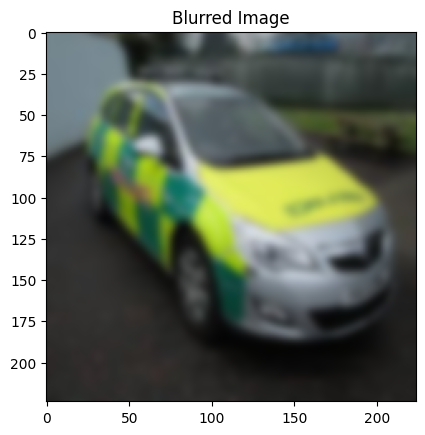

In [18]:
# lets import required libraries from skimage
from skimage.filters import gaussian

# blur the image
blurred = gaussian(image, sigma=2.5, multichannel=True) #multichannel for RGB color pixels, #sigma increases causes more blur

# show result
plt.imshow(blurred)
plt.title('Blurred Image')